# What is **Regression Analysis**
A statistical technique used to investigate the relationship between a dependent variable (target/label) and one or more independent variables (features).


### Typical architecture of a regression neural network.
There are many different ways but this is a generic setup.



| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

*Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

# <span style="font-family: freestyle script; font-size: 130%;">Step 0.</span> <span style="color: #00773e; font-size: 120%">The setup</span>
<hr style="background-color: #00773E; border: 0px; height: 2px;">

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Last run...
import datetime as dt
print(f"Notebook last run: {dt.datetime.now()}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Notebook last run: 2024-01-20 14:16:41.949670


# <span style="font-family: freestyle script; font-size: 130%;">Step 1.</span> <span style="color: #00773e; font-size: 120%">Get the data</span>
<hr style="background-color: #00773E; border: 0px; height: 2px;">

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/9/auto+mpg).

* The purpose of the data is to predict fuel efficiency (miles per gallon, or MPG) of automobiles based on various attributes.

* Originally derived from the 1983 American Statistical Association Exposition.

In [2]:
# download and import the data using pandas
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                'weight', 'acceleration', 'model_year', 'origin']

raw_dataset = pd.read_csv(data_url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
# take a copy from the data
df = raw_dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


# <span style="font-family: freestyle script; font-size: 130%;">Step 2.</span> <span style="color: #00773e; font-size: 120%">Data Cleaning</span>
<hr style="background-color: #00773E; border: 0px; height: 2px;">

In [4]:
# get missing values
def get_missing_value_counts(data_frame):
    missing_counts = data_frame.isnull().sum()
    missing_columns = missing_counts[missing_counts > 0]
    return missing_columns

missing_values_table = get_missing_value_counts(df)
missing_values_table

horsepower    6
dtype: int64

In [5]:
# drop the nan value rows
df = df.dropna()

# <span style="font-family: freestyle script; font-size: 130%;">Step 3.</span> <span style="color: #00773e; font-size: 120%">Data Preparation</span>
<hr style="background-color: #00773E; border: 0px; height: 2px;">

In [6]:
# split the data into training and test set
train = df.sample(frac=0.8, random_state=7)
test = df.drop(train.index)
print(train.shape, test.shape)

(314, 8) (78, 8)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

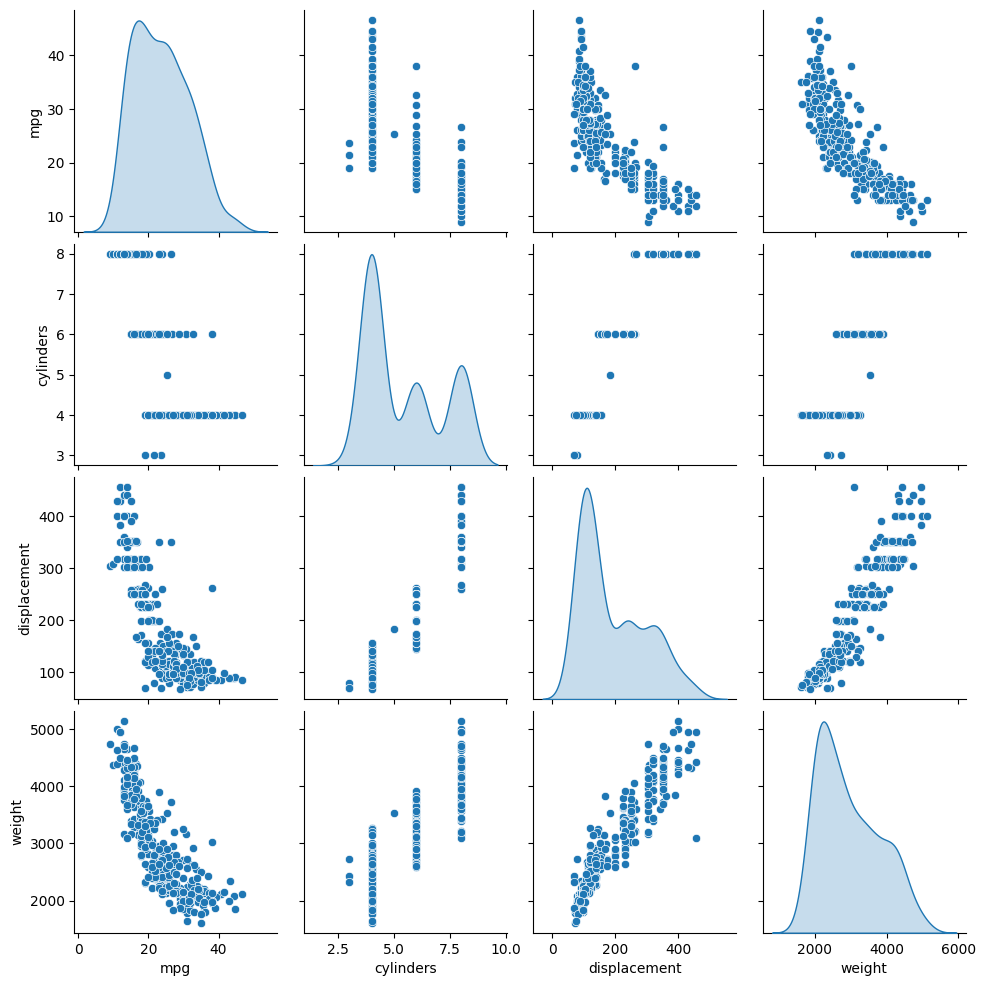

In [7]:
# pairplot
sns.pairplot(
    train[['mpg', 'cylinders', 'displacement', 'weight']], 
    diag_kind='kde')

In [8]:
# split features from labels
X = df.drop('mpg', axis=1)
y = df['mpg']

X_train = train.drop('mpg', axis=1)
X_test = test.drop('mpg', axis=1)

y_train = train['mpg']
y_test = test['mpg']

print('splitting compeleted successfully!')

splitting compeleted successfully!


In [9]:
# Normalizing the features X
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

print("Normalization is done!")

Normalization is done!


# <span style="font-family: freestyle script; font-size: 130%;">Step 4.</span> <span style="color: #00773e; font-size: 120%">Regression with a deep neural network (DNN)</span>
<hr style="background-color: #00773E; border: 0px; height: 2px;">

In [10]:
## build the model
dnn_model = keras.Sequential([
    layers.InputLayer(input_shape=[7, ]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error'
)

In [11]:
%%time
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100, verbose=0
)

CPU times: user 6.7 s, sys: 677 ms, total: 7.38 s
Wall time: 6.76 s


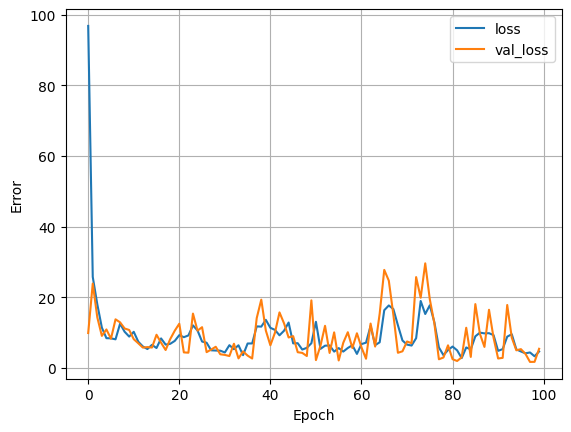

In [12]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [13]:
# collect the test results for later
test_results = {}
test_results['linear_model'] = dnn_model.evaluate(
    X_test, y_test, verbose=0
)

3/3 [==============================] - 0s 2ms/step


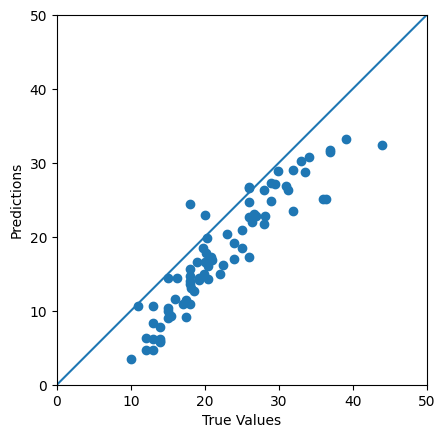

In [14]:
# performance

test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.xlim([0, 50])
plt.ylim([0, 50])
_ = plt.plot([0, 50], [0, 50])

# <span style="font-family: freestyle script; font-size: 130%;">Useful</span> <span style="color: #00773e; font-size: 120%">Resources</span>
<hr style="background-color: #00773E; border: 0px; height: 2px;">

- TensorFlow Core. [*Basic regression: Predict fuel efficiency*](https://www.tensorflow.org/tutorials/keras/regression). TensorFlow.
- Misra Turp. 2023. [*50 Days of Deep Learning*](https://youtube.com/playlist?list=PLM8lYG2MzHmQn55ii0duXdO9QSoDF5myF&si=s1pe9cRtFjKCPqR5). YouTube.
- Grant Sanderson. 2017. [*Neural Networks, Deep Learning*](https://youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&si=ieGLDzRU2Ln9L0RO). YouTube.